## Logistic Regression from scratch (Binary Classification)
Implementation of Logistic Regression using Gradient Descent.

#### Sources:

[Cost Function and Gradient Descent](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)


#### Optimization algorithms:
[[advanced-optimization]](https://www.coursera.org/learn/machine-learning/lecture/licwf/advanced-optimization)
- Gradient descent
- Conjugate gradient
- BFGS
- L-BFGS


#### Useful Links:

[Logistic regression (binary) - computing the gradient](https://www.youtube.com/watch?v=hWLdFMccpTY)

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

from numpy.random import RandomState

prng = RandomState(10)

### Hypothesis function

Logistic Regression hypothesis function is defined as:

$$z = \theta^Tx,$$

$$h_\theta(x) = g(z),$$

where function g is the Sigmoid function and is defined as:

$$g(z)= \frac{1}{1+e^{-z}}$$


### Sigmoid function - Implementation

In [2]:
def sigmoid_function(z):
    """
    Applies sigmoid function to an integer or an array
    
    Params:
        z (int or array)
    """
    return 1/(1+(np.exp(-z)))



### Sigmoid function - Properties
[[decision-boundary]](https://www.coursera.org/learn/machine-learning/supplement/N8qsm/decision-boundary)

$$z = 0 \implies e^{-z} = 1 \implies  g(z) \rightarrow 0.5$$

$$z \rightarrow \infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 1$$

$$z \rightarrow -\infty, \implies e^{-z} \rightarrow 0 \implies g(z) \rightarrow 0$$

### Test Sigmoid Function

In [3]:
print('z=0, g(z) = {}'.format(sigmoid_function(0)))
print('z=20, g(z) = {}'.format(sigmoid_function(20).round(8)))
print('z=-20, g(z) = {}'.format(sigmoid_function(-20).round(8)))

z=0, g(z) = 0.5
z=20, g(z) = 1.0
z=-20, g(z) = 0.0


### Vectoried Cost Function:
[[cost-function]](https://www.coursera.org/learn/machine-learning/supplement/bgEt4/cost-function)

We will try to minimise the cost function.

$$h=g(Xθ)$$

$$J(θ)=\frac{1}{m}⋅(−y^{T}log(h)−(1−y)^{T}log(1−h))$$

In [336]:
np.log1p?

In [614]:
def cost_function(x, y, theta):
    """
    Returns the cost for given x, y, and theta.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    
    c1 = -y.T @ np.log(h)
    c2 = (1-y).T @ np.log(1-h)
    
    J = (1/m) * ( c1 - c2 )
    
    return J[0, 0]



### Gradient Descent:
[[gradient-descent]](https://www.coursera.org/learn/machine-learning/supplement/0hpMl/simplified-cost-function-and-gradient-descent)

We will use Gradient Descent to minimise the cost function.

General form of gradient descent:
\begin{align}
Repeat \{ \\
        θ_j := θ_j − \alpha\frac{∂}{∂θ_j}J(θ) \\
\}
\end{align}


Vectorised implementation after workig out the partial derivatives:

\begin{align}
θ := θ− \frac{α}{m} X^T(g(Xθ) - y)
\end{align}


In [615]:
def gradient_descent(x, y, theta, alpha=0.01):
    """
    Returns coefficients (theta) by performing one step
    of gradient descent.
    
    Params:
        x (numpy array): ((M x (N+1)) matrix), these are 
            the dataset features.
            
        y (numpy array): (M x 1) column vector, this is
            the value to be predicted.
            
        theta (numpy array): Co-efficients
        
        alpha (float): Learning rate for gradient descent
            algorithm
    
    """
    m = y.shape[0]
    z = x @ theta
    h = sigmoid_function(z)
    errors = h - y
    theta = theta - ((alpha/m) * (x.T @ errors))
    return theta
    

In [616]:
def fit(x, y, alpha=0.01, steps=1000):
    m = y.shape[0]
    x = np.append(np.ones((m, 1)), x, axis=1)
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
    
    costs = []
    for _ in range(steps):
        theta = gradient_descent(x, y, theta, alpha)
        cost = cost_function(x, y, theta)
        costs.append(cost)
    return {'costs': costs, 'theta': theta}


### Testing implementation

In [617]:
df = pd.read_csv('./data/ex2data1.txt', header=None, names=['x1', 'x2', 'y'])

x = df[['x1', 'x2']].to_numpy()
y = df[['y']].to_numpy()


In [618]:
df.tail(3)

,x1,x2,y
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


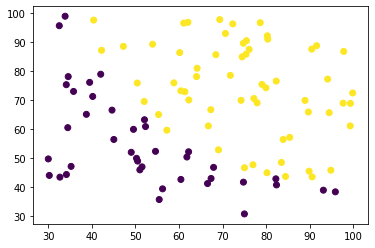

In [619]:
plt.scatter(df['x1'], df['x2'], c=df['y']);

In [641]:
result = fit(x, y, alpha=0.0009, steps=1000000)

### Check if the cost values are always decreasing

In [642]:
costs = result['costs']
costs[:3], costs[-3:]

([0.6768973660511656, 0.6442643053851189, 0.6399593658912844],
 [0.22786452318111042, 0.2278644912061497, 0.2278644592312501])

In [643]:
for i in range(len(costs)-1):
    if costs[i] < costs[i+1]:
        print(costs[i], costs[i+1])

### Plot the hypothesis curve

In [644]:
theta = result['theta']
theta

array([[-14.82886338],
       [  0.1237507 ],
       [  0.11791487]])

In [645]:
plot_x = df['x1'].min(), df['x1'].max()
plot_x = np.array(x_min_max)[:, np.newaxis]

In [646]:
plot_x

array([[30.05882245],
       [99.8278578 ]])

In [647]:
c1 = (-1/theta[2][0])

In [648]:
c1*((theta[1, 0] * plot_x) + theta[0])

array([[94.21256914],
       [20.99053593]])

In [46]:
x1 = np.linspace(*x_min_max, 40)[:, np.newaxis]
x1 = np.append(np.ones((x1.shape[0], 1)), x1, axis=1)

array([0.00053226])

In [83]:
-(1/theta[2])

array([-1878.78247805])

In [103]:
x1, x2 = 45, 85
p_random = RandomState(10)


y_pred = theta[0] + (theta[1]*x1) + (theta[2]*x2)
sigmoid_function(y_pred)

array([0.62378246])

### Logistic Regression using Sklearn

In [124]:
model = LogisticRegression()
model.fit(x, y[:, 0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
model.intercept_, model.coef_

(array([-25.05219314]), array([[0.20535491, 0.2005838 ]]))

In [307]:
LogisticRegression?

In [ ]:
Linear\ Regression\ from\ scratch.ipynb

In [542]:
p = np.array([[1], [2], [3]])

In [545]:
for x in p:
    print(x[0])

1
2
3
